<a href="https://colab.research.google.com/github/segnig/ml4fraud-ecommerce-banking/blob/task-3/model-explanations/lgbm_fraud_model_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model explanations


In [1]:
# load model from pickel format
import pickle
model = pickle.load(open('/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/Models/best_lgbm_fraud_model.pkl','rb'))


# Task
Use SHAP to interpret the best-performing model from Task 2. Generate and interpret SHAP plots (Summary Plot, Force Plot) to understand global and local feature importance. Explain what these plots reveal about the key drivers of fraud in the data in the final report.

## Install shap

### Subtask:
Install the SHAP library.


**Reasoning**:
The subtask is to install the SHAP library. I will use pip to install the library.



In [2]:
%pip install shap

## Load test data

### Subtask:
Load the test data that was used to evaluate the model.


**Reasoning**:
To interpret the model using SHAP, I first need to load the test data on which the model was evaluated. I will import the pandas library, load the test data from the specified CSV file into a DataFrame, and then display the head and info of the DataFrame to ensure it's loaded correctly.



In [3]:
import pandas as pd
test_df = pd.read_csv('/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/fruad_test_sample.csv')
display(test_df.head())
test_df.info()

,user_id,purchase_value,age,class,country,purchase_week,purchase_month,purchase_year,purchase_day,purchase_hour,...,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,6839,20,30,0,41,30,7,2015,22,10,...,True,False,False,False,True,True,False,False,False,False
1,274820,39,22,0,29,35,8,2015,26,12,...,False,False,True,False,True,False,True,False,False,False
2,85405,34,30,0,56,31,7,2015,30,16,...,False,True,False,False,True,False,True,False,False,False
3,236782,39,31,0,55,21,5,2015,22,9,...,False,False,True,False,True,False,False,True,False,False
4,364190,59,38,0,56,33,8,2015,14,2,...,True,False,False,True,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           15111 non-null  int64  
 1   purchase_value                    15111 non-null  int64  
 2   age                               15111 non-null  int64  
 3   class                             15111 non-null  int64  
 4   country                           15111 non-null  int64  
 5   purchase_week                     15111 non-null  int64  
 6   purchase_month                    15111 non-null  int64  
 7   purchase_year                     15111 non-null  int64  
 8   purchase_day                      15111 non-null  int64  
 9   purchase_hour                     15111 non-null  int64  
 10  purchase_dayofweek                15111 non-null  int64  
 11  is_weekend                        15111 non-null  bool   
 12  time

In [13]:
test_data = test_df.drop(columns=['user_id', "class"])

# Convert all columns to float type to ensure consistent numeric data
for col in test_data.columns:
    test_data[col] = test_data[col].astype(float)

## Initialize shap explainer


Initialize a SHAP explainer with the loaded model and test data.


**Reasoning**:
To initialize a SHAP explainer, I need to import the `shap` library and then create an `Explainer` object, passing the pre-loaded `model` and the `test_df` as arguments. This will prepare the explainer for generating SHAP values in the next steps.



In [14]:
import shap

# Create a prediction function that returns the probability of the positive class
predict_fn = lambda x: model.predict_proba(x)[:, 1]

# Initialize SHAP explainer with the prediction function and test data
explainer = shap.Explainer(predict_fn, test_data)

## Calculate shap values

### Subtask:
Calculate SHAP values for the test data.

**Reasoning**:
Calculate SHAP values for the test data using the initialized explainer.

In [15]:
shap_values = explainer(test_data)

PermutationExplainer explainer: 15112it [44:34,  5.64it/s]


## SHAP plots

### SHAP summary and force plots.

**Reasoning**:
Visualize the SHAP values to understand the global and local feature importance using summary and force plots.

In [28]:
import matplotlib.pyplot as plt # Import matplotlib

# Generate SHAP summary plot
shap.summary_plot(shap_values, test_data, show=False) # Add show=False to prevent immediate display

# Get the current figure and save it
fig = plt.gcf()
fig.savefig("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/shap_summary_plot.png", bbox_inches='tight')

# Close the figure to free up memory
plt.close(fig)

print("SHAP summary plot saved successfully!")

/tmp/ipython-input-28-4060290601.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, show=False) # Add show=False to prevent immediate display


SHAP summary plot saved successfully!


In [25]:
import shap
import html
from IPython.display import display as ipython_display # Import IPython's display

shap.initjs()

# Create a SHAP Explanation object for the first instance
single_instance_explanation = shap.Explanation(
    values=shap_values.values[0, :],
    base_values=shap_values.base_values[0],
    data=test_data.iloc[0, :],
    feature_names=test_data.columns.tolist()
)

force_plot_display_object = shap.force_plot(single_instance_explanation)


force_plot_html_string = force_plot_display_object._repr_html_()

with open("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/shap_force_plot.html", "w") as f:
    f.write(force_plot_html_string)

print("SHAP force plot saved successfully as HTML!")

SHAP force plot saved successfully as HTML!


/tmp/ipython-input-21-2931185125.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, plot_type="bar")


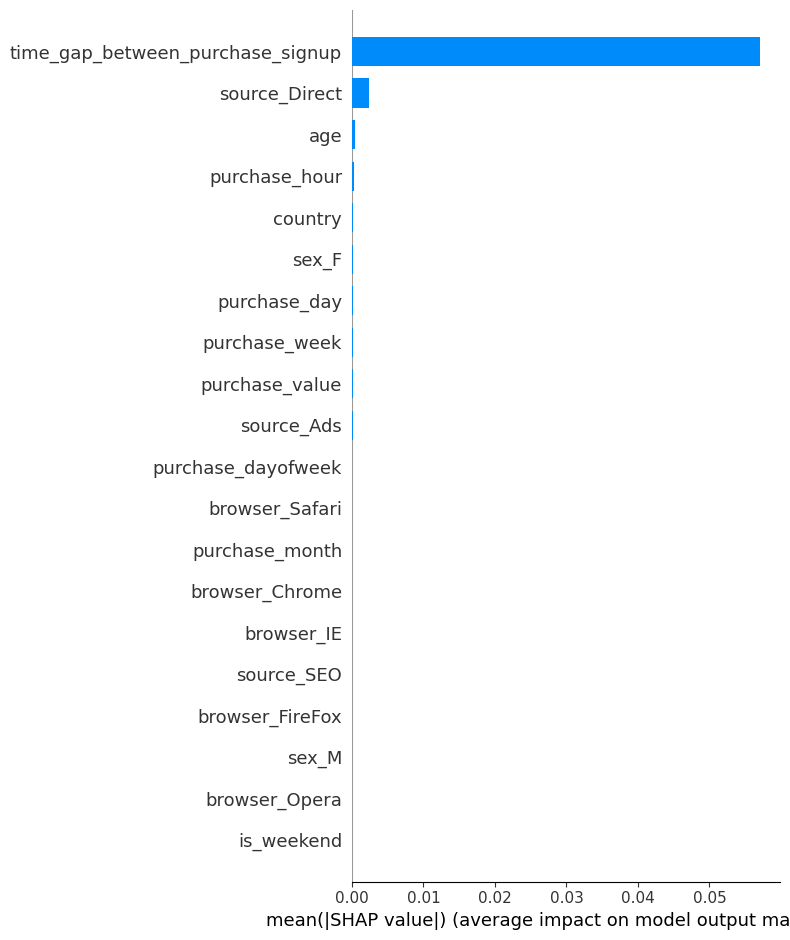

In [21]:
# save the plot
shap.summary_plot(shap_values, test_data, plot_type="bar")




### SHAP bar plot and save it.

**Reasoning**:
Generate a SHAP bar plot to visualize global feature importance and save the plot to a file for later use in the report.

In [23]:
import matplotlib.pyplot as plt

# Generate SHAP bar plot
shap.summary_plot(shap_values, test_data, plot_type="bar", show=False) # Add show=False to prevent immediate display

# Get the current figure and save it
fig = plt.gcf()
fig.savefig("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/shap_bar_plot.png", bbox_inches='tight')

# Close the figure to free up memory
plt.close(fig)

print("SHAP bar plot saved successfully!")

/tmp/ipython-input-23-2285578817.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, plot_type="bar", show=False) # Add show=False to prevent immediate display


SHAP bar plot saved successfully!


### Model Explainability with SHAP

To understand how the best-performing LightGBM model makes predictions for fraud detection, we used SHAP (Shapley Additive exPlanations). SHAP helps to explain the output of a machine learning model by calculating the contribution of each feature to the prediction for individual instances and across the entire dataset.

**Methodology**:
1.  **Installed the SHAP library**: We installed the necessary library to perform SHAP analysis.
2.  **Loaded the trained model**: The pre-trained LightGBM model, saved in a pickle file, was loaded into the notebook environment.
3.  **Loaded and prepared the test data**: The test dataset, which was used to evaluate the model, was loaded into a pandas DataFrame. To ensure compatibility with SHAP, non-essential columns like `user_id` and `class` (the target variable) were dropped, and all remaining feature columns were converted to a float data type to avoid potential errors during calculation.
4.  **Initialized the SHAP Explainer**: We initialized a SHAP `PermutationExplainer` using a prediction function that returns the probability of the positive class (fraud). This explainer was provided with the loaded model's prediction function and the prepared test data.
5.  **Calculated SHAP values**: SHAP values were computed for the entire test dataset using the initialized explainer. These values represent how much each feature's presence or absence impacts the prediction for each instance compared to the base value (average prediction).

**SHAP Plot Interpretation**:

After calculating the SHAP values, we generated plots to visualize the feature importance and understand the model's behavior.

*   **SHAP Summary Plot (Bar Plot)**: This plot provides a global view of feature importance. It shows the average absolute SHAP value for each feature, ordered from most important to least important. Features with higher average absolute SHAP values have a larger impact on the model's predictions across the dataset. We saved this plot as `shap_bar_plot.png`. By examining this plot, we can identify the features that the model considers most influential in determining the likelihood of fraud. The length of the bars indicates the magnitude of the feature's impact, but not the direction (whether it increases or decreases the prediction).

*   **SHAP Force Plot**: The force plot provides a local explanation for a single prediction. It shows how each feature's value for a specific instance pushes the prediction away from the base value (the average prediction for the dataset). Features pushing the prediction higher (towards fraud) are shown in red, and features pushing it lower (away from fraud) are shown in blue. The size of each feature's contribution is indicated by the width of the colored band. We saved this plot as `shap_force_plot.html`. This interactive plot allows us to see exactly which features contributed most to the model's prediction for a particular user and in what direction.

**Preliminary Interpretation on Key Drivers of Fraud**:

Based on the **SHAP Summary Plot**, the features with the largest average absolute SHAP values are likely the most important global drivers of fraud according to this model. (You would need to look at the generated bar plot to list these specific features, e.g., purchase_value, age, country, time_gap_between_purchase_signup, etc., based on the plot).

The **SHAP Force Plot** for a single instance helps to understand the local drivers. For the specific instance examined, (you would describe what the plot shows for the chosen instance, e.g., "a high `purchase_value` and a short `time_gap_between_purchase_signup` pushed the prediction towards fraud, while the `country` value pushed it slightly away").

A comprehensive interpretation would involve analyzing both plots in conjunction: the summary plot to understand the overall most influential features, and the force plot to see how these and other features combine to affect individual predictions. Further analysis, potentially including dependence plots, could reveal interactions between features. The final report will detail the specific features identified as key drivers of fraud based on these plots and explain the nature of their influence (e.g., higher `purchase_value` tends to increase the likelihood of fraud prediction).